In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../flight-delays/flights.csv')
df.head()

C:\Users\sters\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(df)

5819079

In [5]:
df["TOTAL_DELAY"] = df["DEPARTURE_DELAY"] + df["ARRIVAL_DELAY"]
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'TOTAL_DELAY'],
      dtype='object')

In [6]:
clean_df = df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'TOTAL_DELAY']]
clean_df = clean_df[clean_df['DEPARTURE_DELAY'] > 0.0]
clean_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_DELAY,ARRIVAL_DELAY,TOTAL_DELAY
7,2015,1,1,4,14.0,-10.0,4.0
9,2015,1,1,4,3.0,-15.0,-12.0
20,2015,1,1,4,25.0,6.0,31.0
27,2015,1,1,4,12.0,25.0,37.0
29,2015,1,1,4,21.0,2.0,23.0


In [7]:
months = clean_df['MONTH'].value_counts()
months

6     215381
7     209619
3     193817
8     190840
12    189339
5     178856
1     176627
2     173442
4     167314
11    152690
10    145102
9     132591
Name: MONTH, dtype: int64

In [8]:
months_df = pd.DataFrame(months).sort_index()
months_df.index.name = 'Month'
months_df.rename(columns={'MONTH': 'Delay Count'},
                 index={1: 'January', 2: 'February', 3: 'March', 4: 'April',
                        5: 'May', 6: 'June', 7: 'July', 8: 'August', 
                        9: 'September', 10: 'October', 11: 'November', 12: 'December'},
                 inplace=True)
months_df

,Delay Count
Month,
January,176627
February,173442
March,193817
April,167314
May,178856
June,215381
July,209619
August,190840
September,132591


In [9]:
months_df["Days in Month"] = [31, 28, 31, 30, 30, 30, 31, 31, 30, 31, 30, 31]
months_df["Daily Average"] = months_df["Delay Count"]/months_df["Days in Month"]
months_df["Daily Average"] = months_df["Daily Average"].round()
months_df

,Delay Count,Days in Month,Daily Average
Month,,,
January,176627,31,5698.0
February,173442,28,6194.0
March,193817,31,6252.0
April,167314,30,5577.0
May,178856,30,5962.0
June,215381,30,7179.0
July,209619,31,6762.0
August,190840,31,6156.0
September,132591,30,4420.0


In [10]:
weekday = clean_df['DAY_OF_WEEK'].value_counts()
weekday

4    334387
5    328846
1    323709
3    303044
7    301640
2    295772
6    238220
Name: DAY_OF_WEEK, dtype: int64

In [11]:
weekday_full = df['DAY_OF_WEEK'].value_counts()
weekday_full

4    872521
1    865543
5    862209
3    855897
2    844600
7    817764
6    700545
Name: DAY_OF_WEEK, dtype: int64

In [12]:
weekday_df2 = pd.DataFrame(weekday_full).sort_index()
weekday_df2.index.name = 'Day of Week'
weekday_df2.rename(columns={'DAY_OF_WEEK': 'Flight Count'},
                 index={1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'},
                 inplace=True)
weekday_df2

,Flight Count
Day of Week,
Monday,865543
Tuesday,844600
Wednesday,855897
Thursday,872521
Friday,862209
Saturday,700545
Sunday,817764


In [13]:
weekday_df = pd.DataFrame(weekday).sort_index()
weekday_df.index.name = 'Day of Week'
weekday_df.rename(columns={'DAY_OF_WEEK': 'Delay Count'},
                 index={1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'},
                 inplace=True)
weekday_df

,Delay Count
Day of Week,
Monday,323709
Tuesday,295772
Wednesday,303044
Thursday,334387
Friday,328846
Saturday,238220
Sunday,301640


In [14]:
weekday_df = weekday_df.merge(weekday_df2, left_index=True, right_index=True)
weekday_df['Delay Percentage'] = weekday_df['Delay Count']/weekday_df['Flight Count']
weekday_df

,Delay Count,Flight Count,Delay Percentage
Day of Week,,,
Monday,323709,865543,0.373995
Tuesday,295772,844600,0.350192
Wednesday,303044,855897,0.354066
Thursday,334387,872521,0.383242
Friday,328846,862209,0.381399
Saturday,238220,700545,0.340050
Sunday,301640,817764,0.368859


<IPython.core.display.Javascript object>


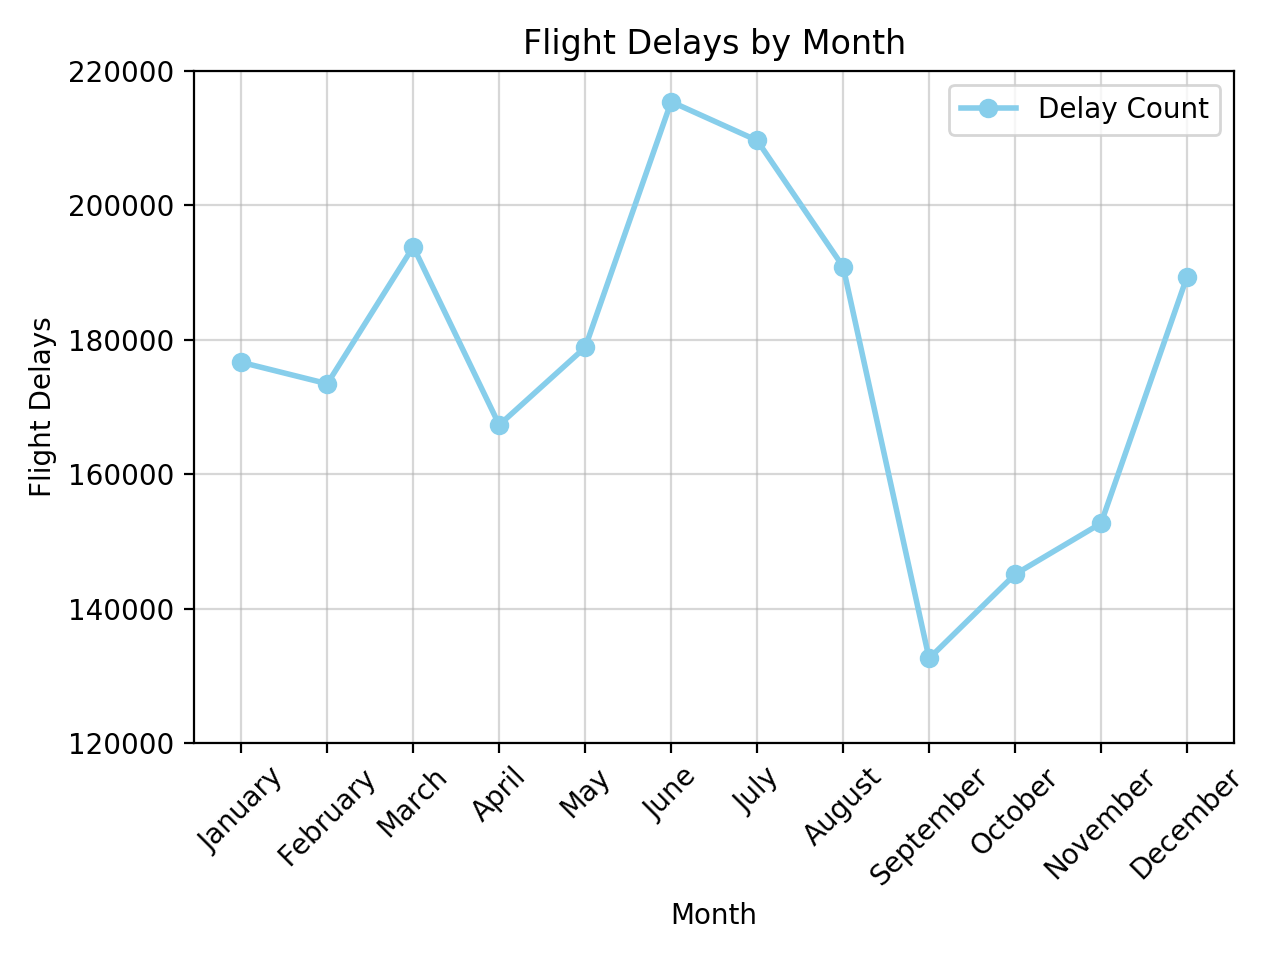

In [15]:
months_df.plot(y="Delay Count", marker="o", color="skyblue", linewidth=2, rot=45)
plt.title("Flight Delays by Month")
plt.xlabel("Month")
plt.ylabel("Flight Delays")
plt.ylim(ymin=120000, ymax=220000)
plt.xticks(np.arange(12), months_df.index)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()
plt.savefig('Months')

<IPython.core.display.Javascript object>


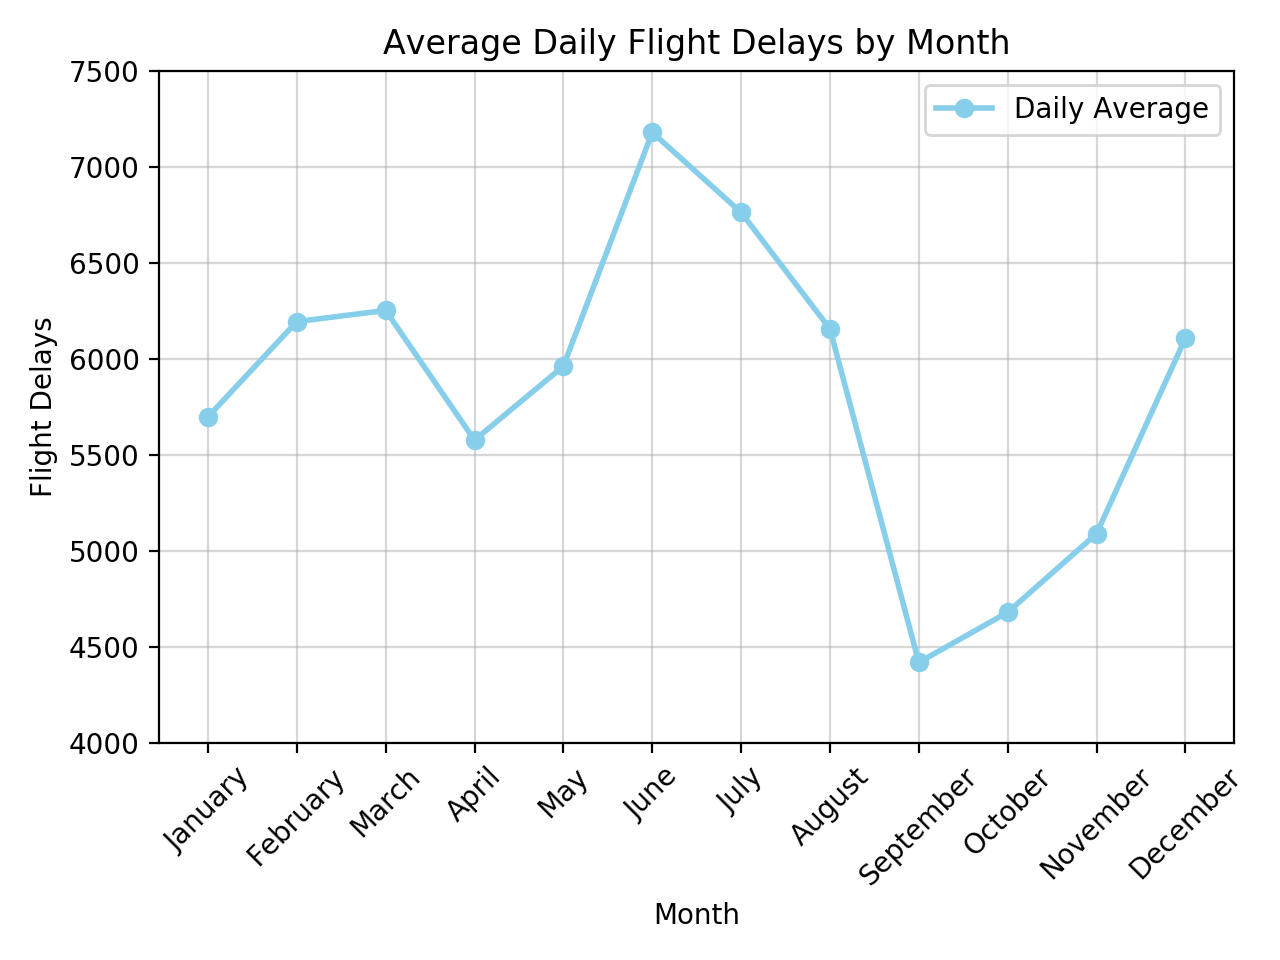

In [16]:
months_df.plot(y="Daily Average", marker="o", color="skyblue", linewidth=2, rot=45)
plt.title("Average Daily Flight Delays by Month")
plt.xlabel("Month")
plt.ylabel("Flight Delays")
plt.ylim(ymin=4000, ymax=7500)
plt.xticks(np.arange(12), months_df.index)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()
plt.savefig('Months AVG')

<IPython.core.display.Javascript object>


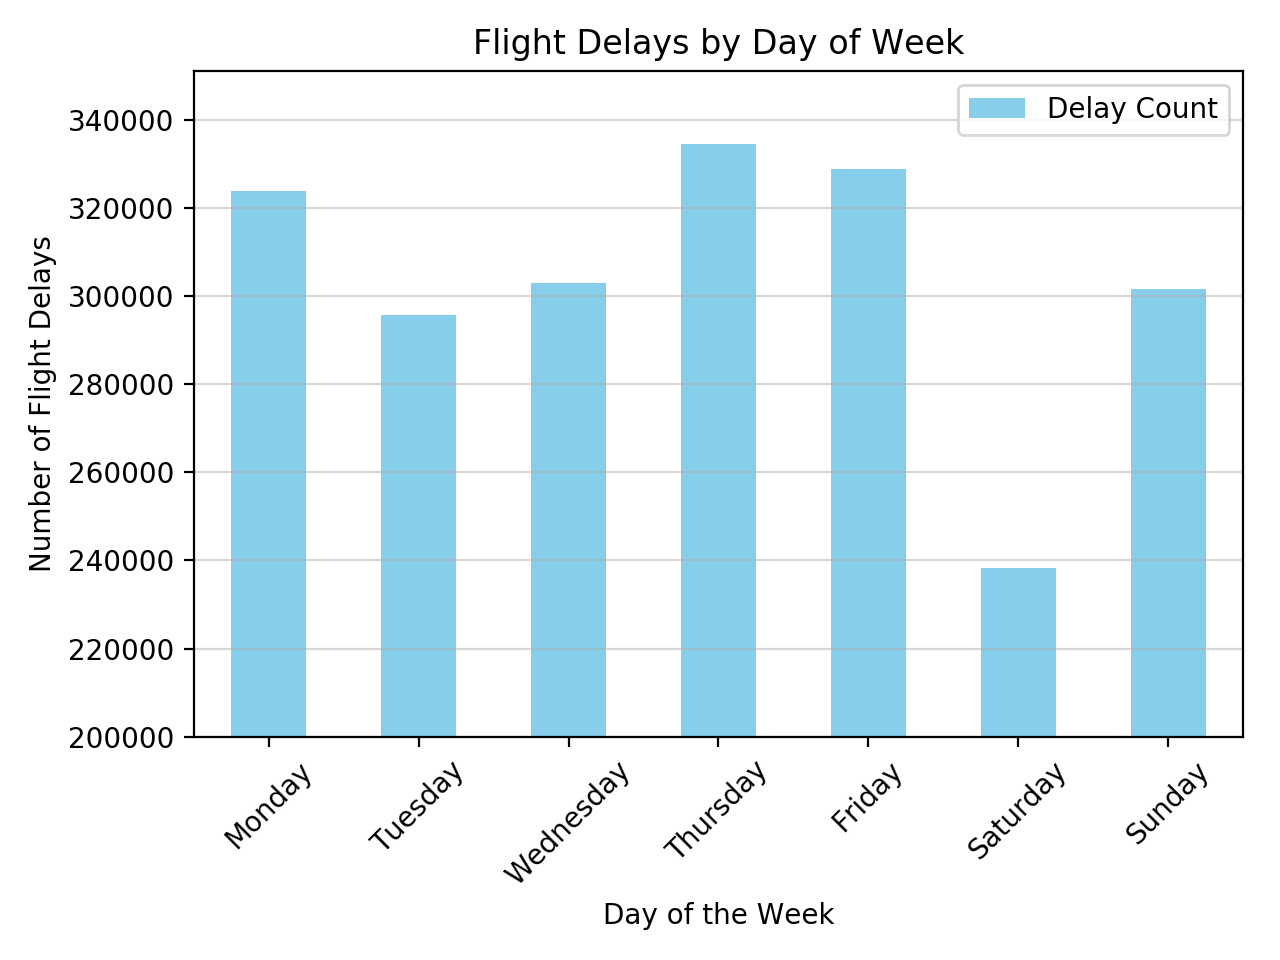

In [17]:
weekday_df.plot(y="Delay Count", kind="bar", title="Day of the Week", facecolor="skyblue", alpha=1, align="center", rot=45)
plt.title("Flight Delays by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Flight Delays")
plt.ylim(ymin=200000)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()
plt.savefig('Days')

<IPython.core.display.Javascript object>


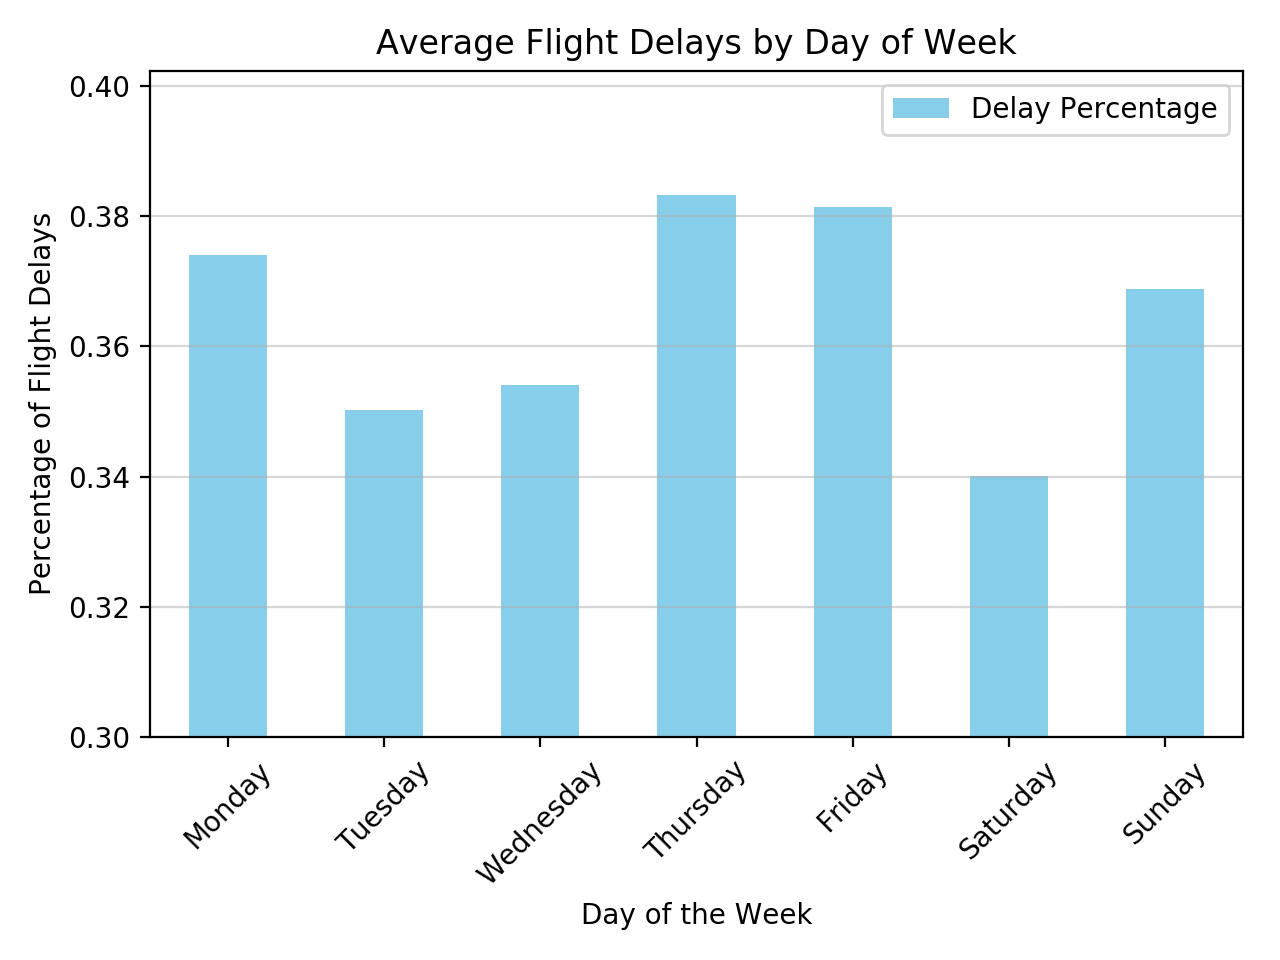

In [18]:
weekday_df.plot(y="Delay Percentage", kind="bar", title="Day of the Week", facecolor="skyblue", alpha=1, align="center", rot=45)
plt.title("Average Flight Delays by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Percentage of Flight Delays")
plt.ylim(ymin=0.3)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()
plt.savefig('Days Percent')